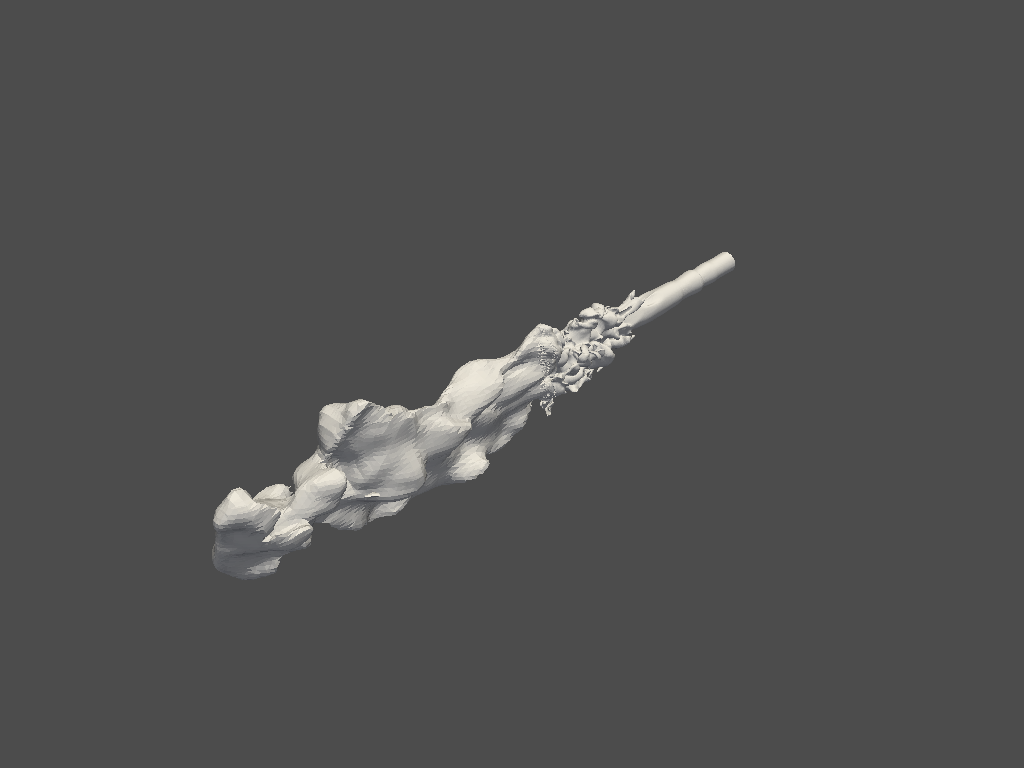

array([[     0,      1,      2],
       [     3,      0,      2],
       [     4,      5,      6],
       ...,
       [276961, 277631, 277646],
       [277212, 276961, 277646],
       [277631,   7957, 277646]])

In [14]:
import pyvista as pv

# read the data
grid = pv.read('surf0.stl')
#print grid.vertices()
# plot the data with an automatically created Plotter
grid.plot(show_scalar_bar=False, show_axes=False)
grid.faces.reshape(-1, 4)[:, 1:]

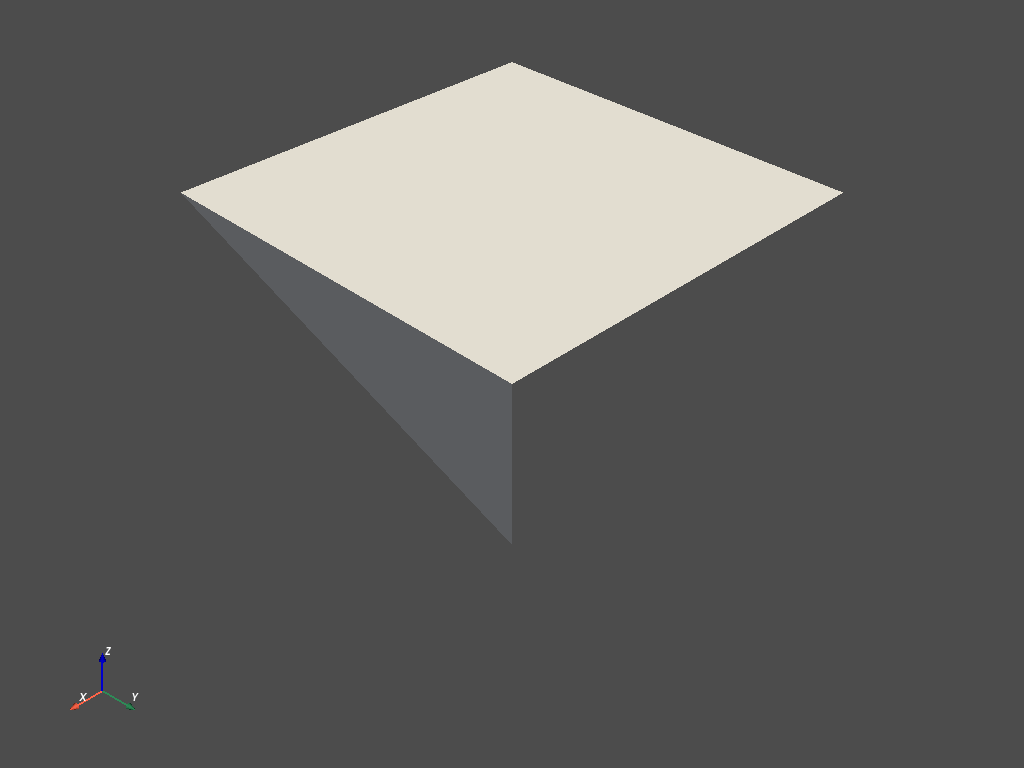

[(2.431851652578137, 2.431851652578137, 1.4318516525781368),
 (0.5, 0.5, -0.5),
 (0.0, 0.0, 1.0)]

In [10]:
import numpy as np
import pyvista as pv
# mesh points
vertices = np.array([[0, 0, 0],
                     [1, 0, 0],
                     [1, 1, 0],
                     [0, 1, 0],
                     [0.5, 0.5, -1]])

# mesh faces
faces = np.hstack([[4, 0, 1, 2, 3],  # square
                   [3, 0, 1, 4],     # triangle
                   [3, 1, 2, 4]])    # triangle

surf = pv.PolyData(vertices, faces)

# plot each face with a different color
surf.plot()

In [28]:
import k3d
import os
import vtk
import numpy as np
from k3d.helpers import download
from vtk.util import numpy_support


import pyvista as pv

# read the data
grid = pv.read('surf0.stl')
grid2 = pv.read('surf10.stl')
#print grid.vertices()
# plot the data with an automatically created Plotter
#grid.plot(show_scalar_bar=False, show_axes=False)
#faces = grid.faces.reshape(-1, 4)[:, 1:]
#points = grid.points

mesh = grid.extract_geometry()

points = mesh.points
faces = mesh.faces
faces = faces.reshape(-1, 4)[:, 1:]


#filename = 'cow.vtp'
filename = 'block0.vtm'
#filename = 'contour0.stl'


model_matrix = (
     1.0,  0.0, 0.0, 0.0,
     0.0,  0.0, 1.0, 0.0,
     0.0,  1.0, 0.0, 0.0,
     0.0,  0.0, 0.0, 1.0
)

reader = vtk.vtkXMLMultiBlockDataReader()
#reader = vtk.vtkSTLReader()
#reader = vtk.vtkXMLPolyDataReader()
#reader.SetFileName(filename)
#reader.Update()
#geometry_ws = reader.GetOutput()
reader.SetFileName(filename)
reader.Update()
g = reader.GetOutput()

if isinstance(g, (vtk.vtkPolyData)):
    print ('hi\n\n')

    
u = pv.UnstructuredGrid(g.GetBlock(0).GetBlock(0)) 



bbox = np.array(u.GetBounds()).reshape(3,2)
center = np.mean(bbox,axis=1)
center

plane = vtk.vtkPlane()
plane.SetOrigin(*center)
plane.SetNormal(1,0.3,0)


def vtk_ExtractSurface(vtk_outputport,vtk_o,vtk_n):

    plane.SetOrigin(*vtk_o)
    plane.SetNormal(*vtk_n)

    myExtractGeometry = vtk.vtkExtractGeometry()
    myExtractGeometry.SetInputData(vtk_outputport)
    myExtractGeometry.SetImplicitFunction(plane)
    myExtractGeometry.ExtractInsideOn()
    myExtractGeometry.SetExtractBoundaryCells(0);
    myExtractGeometry.Update()

    myExtractSurface = vtk.vtkDataSetSurfaceFilter()
    myExtractSurface.SetInputConnection(myExtractGeometry.GetOutputPort())
    myExtractSurface.Update()

    return myExtractSurface.GetOutput()


plane = vtk.vtkPlane()
plane.SetOrigin(*center)
plane.SetNormal(1,0.3,0)

vtk_n = np.array([ 0. ,  .3,  0. ])
vtk_o = np.array([ 0.04984861,  20.03934663,  0.04888905])

plt_vtk = k3d.vtk_poly_data(vtk_ExtractSurface(u, vtk_o,vtk_n) ,color_attribute=('T', 0.0, 2000),
    color_map = k3d.basic_color_maps.Jet)

#print( g.GetBlock(0).GetBlock(0))
#sf = vtk.vtkShrinkFilter()
#sf.SetInput(g.GetBlock(0).GetBlock(0))
#sf.SetShrinkFactor(10.0)
#sf.Update()
#gf = vtk.vtkGeometryFilter()
#gf.SetInputData(sf.GetOutput())
#gf.Update()
#g = gf.GetOutput()

plot = k3d.plot(time = 1)

plt_mesh = k3d.vtk_poly_data(grid2, opacity=0.05, wireframe=True, color=0xFF0000)
plot += plt_mesh

#plot += k3d.vtk_poly_data(g, opacity=0.1, wireframe=True, color=0xaaaaaa)
#cow3d = k3d.vtk_poly_data(reader.GetOutput(), color=0xff0000,
                          #model_matrix=model_matrix)
#plot += cow3d
#plot = plt_vtk

#plot.fetch_snapshot()

plot.display()
import time 
time.sleep(1)

colors = [0xFF0000,0xFF0000,0xaaaaaa]
grids = [grid,grid,grid2]




vertices = {str(t):numpy_support.vtk_to_numpy(grids[t].GetPoints().GetData()) for t in range(len(grids))}
indices = {str(t):numpy_support.vtk_to_numpy(grids[t].GetPolys().GetData()).reshape(-1, 4)[:, 1:4] for t in range(len(grids))}

#plt_mesh.indices,plt_mesh.vertices = indices,vertices
plt_mesh.color ={int(t):colors[t] for t in range(len(colors))}

print (plt_mesh.color)

#plot.start_auto_play()
#plot.stop_auto_play()
plot.fps = 1




Output()

{0: 16711680, 1: 16711680, 2: 11184810}


In [13]:

f = open('./volume.html', 'w', encoding='UTF-8')
f.write(plot.get_snapshot(9, 'K3DInstance.startAutoPlay();'))
f.close()

In [16]:
import time
for g in [grid2,grid,grid2,grid]:    
    vertices = numpy_support.vtk_to_numpy(g.GetPoints().GetData())
    indices = numpy_support.vtk_to_numpy(g.GetPolys().GetData()).reshape(-1, 4)[:, 1:4]
    plt_mesh.indices,plt_mesh.vertices = indices, vertices#np.array(indices, np.uint32),np.array(vertices, np.float32)
    #plt_mesh.__dict__.update({'vertices':0, 'indices':0})
    #plt_mesh.indices = np.array(indices, np.uint32)
    time.sleep(1)
    



/u/56/shahana1/unix/.local/lib/python3.6/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "int64" does not match required type "uint32". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [24]:
import k3d
import numpy as np

x = np.random.randn(1000,3).astype(np.float32)
point_size = 0.2

plot = k3d.plot(name='points')
plt_points = k3d.points(positions=x, point_size=0.2)
plot += plt_points
plt_points.shader='3d'
plot.display()

Output()

In [25]:
f = (np.sum(x**3-.1*x**2,axis=1))
maps = [k3d.colormaps.basic_color_maps.Binary, k3d.colormaps.basic_color_maps.WarmCool, k3d.colormaps.basic_color_maps.Blues, k3d.colormaps.basic_color_maps.Jet]
colormap = maps[0]#k3d.colormaps.basic_color_maps.WarmCool
colors = k3d.helpers.map_colors(f,colormap,[-2,.1])
colors = colors.astype(np.uint32)



In [26]:
plt_points.colors = colors
#plt_points.colors = k3d.helpers.map_colors(f,maps[0],[-2,.1]).astype(np.uint32) for t in np.linspace(0,4,4))


/u/56/shahana1/unix/.local/lib/python3.6/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "int32" does not match required type "uint32". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [27]:
plt_points.positions = {str(t):x/(1+t*3) for t in np.linspace(0,4,4)}
f = open('./volume.html', 'w', encoding='UTF-8')
f.write(plot.get_snapshot(9, 'K3DInstance.startAutoPlay();'))
f.close()


In [101]:
plot.stop_auto_play()


In [1]:
import ipyvolume as ipv
import numpy as np


u_scale = 10
Nx, Ny = 30, 15
u = np.linspace(-u_scale, u_scale, Nx)
v = np.linspace(-u_scale, u_scale, Ny)
x, y = np.meshgrid(u, v, indexing='ij')
r = np.sqrt(x**2+y**2)
x = x.flatten()
y = y.flatten()
r = r.flatten()

time = np.linspace(0, np.pi*2, 15)
z = np.array([(np.cos(r + t) * np.exp(-r/5)) for t in time])
zz = z



fig = ipv.figure()
s = ipv.scatter(x, 0, y, aux=zz, marker="sphere")
dx = u[1] - u[0]
dy = v[1] - v[0]
# make the x and z lim half a 'box' larger
ipv.xlim(-u_scale-dx/2, u_scale+dx/2)
ipv.zlim(-u_scale-dx/2, u_scale+dx/2)
ipv.ylim(-1.2, 1.2)
ipv.show()

# make the size 1, in domain coordinates (so 1 unit as read of by the x-axis etc)
s.geo = 'box'
s.size = 1
#s.size_x_scale = fig.scales['x']
#s.size_y_scale = fig.scales['y']
#s.size_z_scale = fig.scales['z']

s.shader_snippets = {'size':
 'size_vector.y = SCALE_SIZE_Y(aux_current); '
}



s.shader_snippets = {'size':
 'size_vector.y = SCALE_SIZE_Y(aux_current) - SCALE_SIZE_Y(0.0) ; '
}

s.geo_matrix = [dx, 0, 0, 0,   0, 1, 0, 0,   0, 0, dy, 0,  0.0, 0.5, 0, 1]

# since we see the boxes with negative sizes inside out, we made the material double sided
s.material.side = "DoubleSide"

# Now also include, color, which containts rgb values
color = np.array([[np.cos(r + t), 1-np.abs(z[i]), 0.1+z[i]*0] for i, t in enumerate(time)])
color = np.transpose(color, (0, 2, 1)) # flip the last axes
s.color = color

ipv.animation_control(s, interval=200)

In [4]:
import vtk
import k3d
import numpy as np
import math
import ipywidgets as widgets
from vtk.util import numpy_support
from k3d.helpers import quad, download

filename = download('https://vedo.embl.es/examples/data/embryo.slc')
reader = vtk.vtkSLCReader()
reader.SetFileName(filename)
reader.Update()
vti = reader.GetOutput()

x, y, z = vti.GetDimensions()
volume_data = numpy_support.vtk_to_numpy(vti.GetPointData().GetArray(0)).reshape(-1, y, x).astype(np.float32)

basic_color_maps = [(attr, getattr(k3d.basic_color_maps, attr)) for attr in dir(k3d.basic_color_maps) if not attr.startswith('__')]
paraview_color_maps = [(attr, getattr(k3d.paraview_color_maps, attr)) for attr in dir(k3d.paraview_color_maps) if not attr.startswith('__')]
matplotlib_color_maps = [(attr, getattr(k3d.matplotlib_color_maps, attr)) for attr in dir(k3d.matplotlib_color_maps) if not attr.startswith('__')]
colormaps = basic_color_maps + paraview_color_maps + matplotlib_color_maps

vertices, indices = quad(20.0, 20.0)

plot = k3d.plot()

obj = k3d.mesh(vertices, indices, volume=volume_data, side='double', volume_bounds=[-10, 10, -10, 10, -10, 10])

model_matrix = {}
for t in np.linspace(0, 2* np.pi, 100):
    obj.transform.rotation = [t, math.sin(t), math.cos(t), 1]
    model_matrix[str(t)] = obj.model_matrix

obj.model_matrix = model_matrix  

#print (model_matrix)

#obj.__dict__.update({'model_matrix':model_matrix})

plot += obj
plot.display()



Output()

In [3]:


tf_editor = k3d.transfer_function_editor()

@widgets.interact(x=widgets.Dropdown(options=colormaps, description='ColorMap:'))
def g(x):
    tf_editor.color_map = np.array(x, dtype=np.float32)

_ = widgets.link((tf_editor, 'color_map'), (obj, 'color_map'))
_ = widgets.link((tf_editor, 'opacity_function'), (obj, 'opacity_function'))

tf_editor.display()




interactive(children=(Dropdown(description='ColorMap:', options=(('Binary', [0, 1, 1, 1, 1, 0, 0, 0]), ('Black…

Output()

In [4]:
tf_editor.opacity_function = [
    0, 0,
    0.04, 0,
    0.1, 1, 
    1,1
]

In [17]:
plot.start_auto_play()

In [102]:
plot.stop_auto_play()

In [5]:
f = open('./volume.html', 'w', encoding='UTF-8')
f.write(plot.get_snapshot(9, 'K3DInstance.startAutoPlay();'))
f.close()

In [14]:
import k3d
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import time
plot = k3d.plot()

Nx = 264
Ny = 264
xmin,xmax = -3,3
ymin,ymax = 0,3
x = np.linspace(xmin,xmax,Nx)
y = np.linspace(ymin,ymax,Ny)
x,y = np.meshgrid(x,y,indexing='ij')
surface =  k3d.surface(np.sin(x**2+y**2),xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,\
                       color=int(np.random.randint(0, 0xFFFFFF, 1)[0]))

plot += surface
plot.camera_auto_fit = False
plot.grid_auto_fit = False

/usr/local/lib/python3.6/dist-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  np.dtype(self.dtype).name))


In [15]:
surface.heights = (np.sin(x**2)+np.cos(y**3))

In [16]:
surface.color=0xff0000

In [17]:


@interact(phi=widgets.FloatSlider(value=0.,min=0,max=2*np.pi,step=0.1))
def g(phi):
    f = np.sin(x**2+y**2-phi)
    surface.heights = f



interactive(children=(FloatSlider(value=0.0, description='phi', max=6.283185307179586), Output()), _dom_classe…

In [18]:
plot.display()

Output()

In [10]:
import k3d
import os
import vtk
import numpy as np
from k3d.helpers import download
from vtk.util import numpy_support
import pyvista as pv
import math


def vtk_ExtractSurface(vtk_outputport,vtk_o,vtk_n):

    plane = vtk.vtkPlane()
    plane.SetOrigin(*vtk_o)
    plane.SetNormal(*vtk_n)

    myExtractGeometry = vtk.vtkExtractGeometry()
    myExtractGeometry.SetInputData(vtk_outputport)
    myExtractGeometry.SetImplicitFunction(plane)
    myExtractGeometry.ExtractInsideOn()
    myExtractGeometry.SetExtractBoundaryCells(0);
    myExtractGeometry.Update()

    myExtractSurface = vtk.vtkDataSetSurfaceFilter()
    myExtractSurface.SetInputConnection(myExtractGeometry.GetOutputPort())
    myExtractSurface.Update()

    return myExtractSurface.GetOutput(),myExtractGeometry.GetOutput()


def read_unstr (name):
    filename = name
    reader = vtk.vtkXMLMultiBlockDataReader()
    reader.SetFileName(filename)
    reader.Update()
    out = reader.GetOutput()
    outunst = pv.UnstructuredGrid(out.GetBlock(0).GetBlock(0)) 
    
    bbox = np.array(outunst.GetBounds()).reshape(3,2)
    center = np.mean(bbox,axis=1)
    plane = vtk.vtkPlane()
    plane.SetOrigin(*center)
    plane.SetNormal(1,0.3,0)

    vtk_n = np.array([ 0. ,  .3,  0. ])
    vtk_o = np.array([ 0.04984861,  20.03934663,  0.04888905])  
    s,v = vtk_ExtractSurface(outunst, vtk_o,vtk_n)
    
    return s,v,center,outunst,out


def update_from_cut(m,vtk_o,vtk_n,plt_vtk):
    poly_data, v =  vtk_ExtractSurface(m,vtk_o,vtk_n)
    if poly_data.GetNumberOfCells() > 0:
        vertices,indices,attribute = get_mesh_data(poly_data)
        with plt_vtk.hold_sync():
            plt_vtk.vertices = vertices
            plt_vtk.indices = indices
            plt_vtk.attribute = attribute

            
def get_mesh_data(poly_data,color_attribute=('T', 0.0, 2000)):

    if poly_data.GetPolys().GetMaxCellSize() > 3:
            cut_triangles = vtk.vtkTriangleFilter()
            cut_triangles.SetInputData(poly_data)
            cut_triangles.Update()
            poly_data = cut_triangles.GetOutput()

    if color_attribute is not None:
        attribute = numpy_support.vtk_to_numpy(poly_data.GetPointData().GetArray(color_attribute[0]))
        color_range = color_attribute[1:3]
    else:
        attribute = []
        color_range = []

    vertices = numpy_support.vtk_to_numpy(poly_data.GetPoints().GetData())
    indices = numpy_support.vtk_to_numpy(poly_data.GetPolys().GetData()).reshape(-1, 4)[:, 1:4]

    return (np.array(vertices, np.float32),np.array(indices, np.uint32),np.array(attribute, np.float32))

            
            


# read the data
grid = pv.read('surf0.stl')
grid2 = pv.read('surf10.stl')


c,v,center,m,p = read_unstr ('block0.vtm')
c2,v2,center2,m2,p2 = read_unstr ('block1.vtm')

print(m)


bounds = m.GetBounds()
x, y, z = m.GetDimensions()

volume_data = numpy_support.vtk_to_numpy(m.GetPointData().GetArray(0)).reshape(-1, y, x)


colors = [0xFF0000,0xaaaaaa,0xFF0000]
grids = [grid,grid,grid2]
conturs = [c,c,c2]
cl_at = ('T', 0.0, 2000)
cl_at1 = ('T', 0.0, 2000)
cl_at2 = ('T', 0.0, 2000)

ra = [cl_at1[1:3],cl_at[1:3],cl_at2[1:3]]

plot = k3d.plot()
plot.display()

plt_vtk = k3d.vtk_poly_data(c ,color_attribute = cl_at, color_map = k3d.basic_color_maps.Jet)

plot += plt_vtk

#update_from_cut(m,center+0.0,[1,0,0], plt_vtk)




UnstructuredGrid (0x7ff35d3d2948)
  N Cells:	3876670
  N Points:	3536563
  X Bounds:	0.000e+00, 5.760e-01
  Y Bounds:	-1.440e-01, 1.440e-01
  Z Bounds:	-1.440e-01, 0.000e+00
  N Arrays:	3



AttributeError: 'UnstructuredGrid' object has no attribute 'GetDimensions'

In [4]:
import k3d
import math
import numpy as np
from k3d.helpers import download


import vtk
from vtk.util import numpy_support

filename = download('https://vedo.embl.es/examples/data/embryo.slc')
reader = vtk.vtkSLCReader()
reader.SetFileName(filename)
reader.Update()
vti = reader.GetOutput()

bounds = vti.GetBounds()
x, y, z = vti.GetDimensions()


volume_data = numpy_support.vtk_to_numpy(vti.GetPointData().GetArray(0)).reshape(-1, y, x)


embryo = k3d.volume(volume_data.astype(np.float16), 
                    color_map=np.array(k3d.basic_color_maps.BlackBodyRadiation, dtype=np.float32), 
                    bounds=bounds)

plot = k3d.plot()
plot += embryo
plot.display()

256


Output()

In [4]:
embryo = k3d.mip(volume_data.astype(np.float16), 
                 color_map=np.array(k3d.basic_color_maps.BlackBodyRadiation, dtype=np.float32), 
                 bounds=bounds)

plot = k3d.plot(background_color=0, grid_visible=False)
plot += embryo
plot.display()

Output()

In [5]:
plot.lighting = 0


In [13]:
import k3d
import os
import vtk

from k3d.helpers import download

#filename = download("https://raw.githubusercontent.com/naucoin/VTKData/master/Data/Quadratic/CylinderQuadratic.vtk")
filename = "block0.vtm"


model_matrix = (
     10.0,  0.0, 0.0, 0.0,
     0.0,  10.0, 0.0, 0.0,
     0.0,  0.0, 10.0, 0.0,
     0.0,  0.0, 0.0, 1.0
)

#reader = vtk.vtkUnstructuredGridReader()
reader = vtk.vtkXMLMultiBlockDataReader()
reader.SetFileName(filename)
reader.Update()

geometryFilter = vtk.vtkGeometryFilter()
#geometryFilter.SetInputData(reader.GetOutput())
geometryFilter.SetInputData(reader.GetOutput().GetBlock(0).GetBlock(0))
geometryFilter.Update()

plot = k3d.plot()
cylinder = k3d.vtk_poly_data(geometryFilter.GetOutput(), color_attribute=('T', 0, 2000), 
                             color_map=k3d.basic_color_maps.Jet, model_matrix=model_matrix)
plot += cylinder
plot.display()

Output()

In [11]:
import pyvista as pv
from pyvista import examples

# Download a volumetric dataset
vol = examples.download_knee_full()
vol


UniformGrid (0x7ff35d39f9a8)
  N Cells:	10225800
  N Points:	10368384
  X Bounds:	0.000e+00, 1.497e+02
  Y Bounds:	0.000e+00, 1.786e+02
  Z Bounds:	0.000e+00, 2.000e+02
  Dimensions:	208, 248, 201
  Spacing:	7.230e-01, 7.230e-01, 1.000e+00
  N Arrays:	1

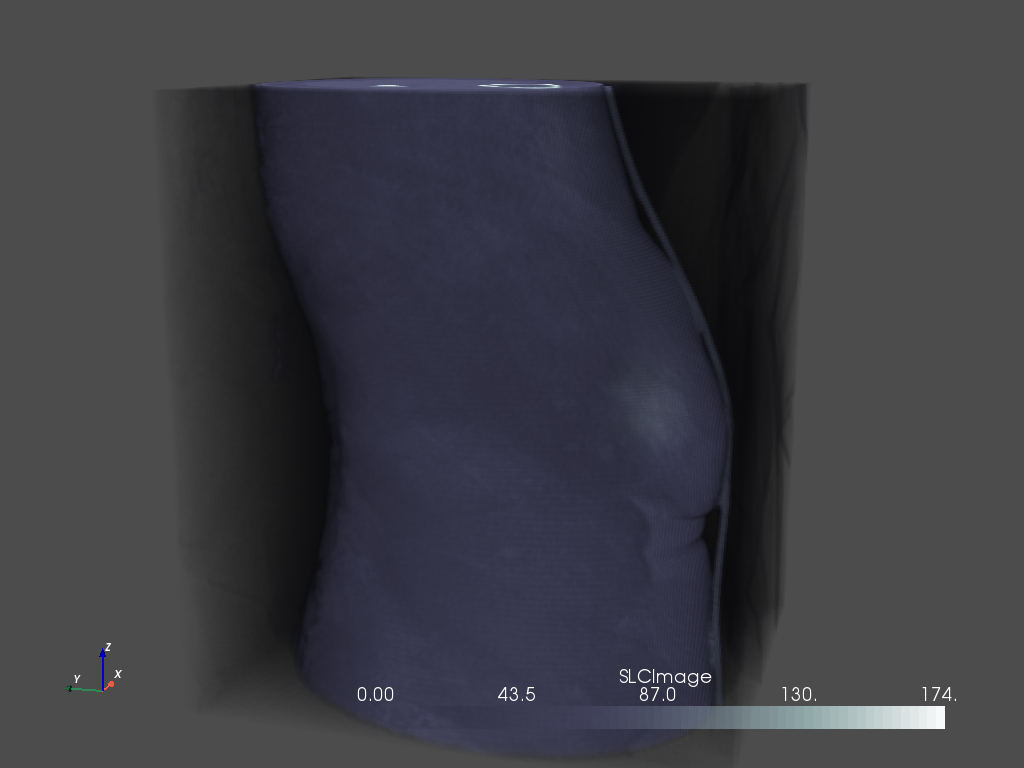

[(-381.74, -46.02, 216.54),
 (74.8305, 89.2905, 100.0),
 (0.23011692910752757, 0.07203660389453036, 0.9704931358013119)]

In [12]:
cpos = [(-381.74, -46.02, 216.54), (74.8305, 89.2905, 100.0), (0.23, 0.072, 0.97)]

vol.plot(volume=True, cmap="bone", cpos=cpos)
